In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
#url = "https://raw.githubusercontent.com/camnugent/california-housing-prices/main/housing.csv"
#data = pd.read_csv(url)
data = pd.read_csv("machine learning/Housing.csv")

In [5]:
# Inspect the data
print("Dataset Head:")
print(data.head())

Dataset Head:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [7]:
# Preprocessing
# Drop rows with missing values
data = data.dropna()

In [9]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [13]:
# Select features for clustering (e.g., median_income and median_house_value)
features = data[['price', 'area']].values
# Standardize the features
features_mean = np.mean(features, axis=0)
features_std = np.std(features, axis=0)
scaled_features = (features - features_mean) / features_std

In [20]:
# K-means from scratch
def initialize_centroids(data, k):
     #Randomly initialize centroids from the data
    np.random.seed(42) # For reproducibility
    random_indices = np.random.permutation(data.shape[0])
    centroids = data[random_indices[:k]]
    return centroids
def assign_clusters(data, centroids):
     #Assign each data point to the nearest cluster
     distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
     return np.argmin(distances, axis=1)
def compute_centroids(data, labels, k):
     #Compute new centroids
     centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
     return centroids
def kmeans(data, k, max_iters=100, tol=1e-4):
     #Perform K-means clustering
     # Initialize centroids
     centroids = initialize_centroids(data, k)
     for i in range(max_iters):
         # Assign clusters
         labels = assign_clusters(data, centroids)
         # Compute new centroids
         new_centroids = compute_centroids(data, labels, k)
         # Check for convergence (if centroids don't change much)
         if np.all(np.abs(new_centroids - centroids) < tol):
             break
         centroids = new_centroids
     return centroids, labels

In [22]:
# Apply K-means
k = 10 #number of clusters
centroids, labels = kmeans(scaled_features, k)

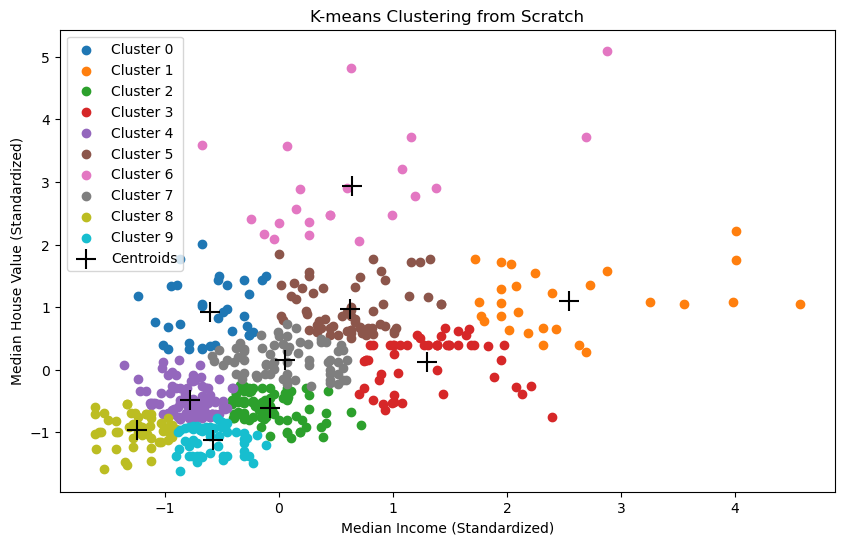

In [24]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
 cluster_points = scaled_features[labels == cluster]
 plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='+', s=200, label='Centroids')
plt.title("K-means Clustering from Scratch")
plt.xlabel("Median Income (Standardized)")
plt.ylabel("Median House Value (Standardized)")
plt.legend()
plt.show()